In [88]:
# import libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from xgboost import XGBRegressor
import warnings 
from sklearn.metrics import r2_score, mean_squared_error
warnings.filterwarnings(action='ignore')

In [36]:
link = "./dataset/hoboken.csv"
hoboken = pd.read_csv(link)
hoboscaler = MinMaxScaler()
hoboken[['Value']] = hoboscaler.fit_transform(hoboken[['Value']])
hoboken.head()

,Date,Value
0,2015-01-31,0.000000
1,2015-02-28,0.027298
2,2015-03-31,0.039681
3,2015-04-30,0.049087
4,2015-05-31,0.066606


In [46]:
# xgboost needs date to be in terms of month 
def create_features(df):
    df['date'] = df['Date']
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    
    X = df[['Date','hour','dayofweek','quarter','month','year',
            'dayofyear','dayofmonth']]
    return X

In [121]:
def xgBoost(train,test):
    target = train.Value
    train = create_features(train)
    trainDate = train.Date
    train = train.drop('Date',axis=1)
    xgb = XGBRegressor(n_estimators = 50,
              n_jobs=-1,
              max_depth = 2,
              max_leaf_nodes=2,
              max_features=2,
              max_samples=4
              )
    xgb.fit(train, target)
    ytest = test.Value
    test = create_features(test)
    testDate = test.Date
    test = test.drop('Date',axis=1)
    ypred = xgb.predict(test)
    plt.figure(figsize=(4,3))
    plt.title("XGboost for philly")
    plt.plot(trainDate,target,c='red', label='train')
    plt.plot(testDate,ypred,c='blue', label='predicted')
    plt.plot(testDate,ytest, c='green', label='test')
    plt.xticks(rotation='vertical')
    plt.legend()
    plt.show()
    return ypred
    

[21:25:49] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "max_features", "max_leaf_nodes", "max_samples" } are not used.


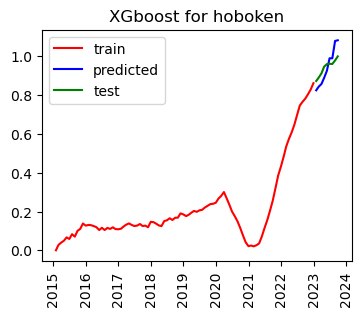

In [101]:
hoboken.Date = pd.to_datetime(hoboken.Date)
train = hoboken[hoboken.Date.dt.year < 2023]
test = hoboken[hoboken.Date.dt.year >= 2023]
ypred = xgBoost(train,test)

In [89]:
print("the mean squared error is ", mean_squared_error(test.Value, ypred))
print("the r2 score is ", r2_score(test.Value, ypred))

the mean squared error is  0.003406024771222738
the r2 score is  -1.1691068576416441


# xgboost for new york dataset

In [102]:
link = './dataset/new york.csv'
newyorkScaler = MinMaxScaler()
new_york = pd.read_csv(link)
new_york.drop(columns='index', axis=1, inplace=True)
new_york[['Value']] = newyorkScaler.fit_transform(new_york[['Value']])

[21:29:24] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "max_features", "max_leaf_nodes", "max_samples" } are not used.


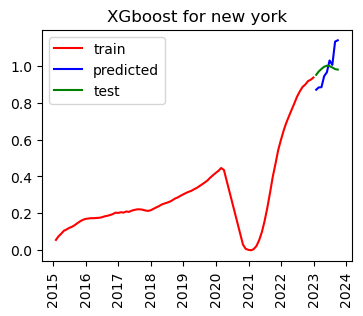

In [112]:
new_york.Date = pd.to_datetime(new_york.Date)
train = new_york[new_york.Date.dt.year < 2023]
test = new_york[new_york.Date.dt.year >= 2023]
ypred = xgBoost(train,test)

In [113]:
print("the mean squared error is ", mean_squared_error(test.Value, ypred))
print("the r2 score is ", r2_score(test.Value, ypred))

the mean squared error is  0.00845768085674134
the r2 score is  -38.179063234501484


# xgboost for philly

In [114]:
link = './dataset/philly.csv'
philly = pd.read_csv(link)
phillyScaler = MinMaxScaler()
philly.Date = pd.to_datetime(philly.Date)
philly[['Value']] = phillyScaler.fit_transform(philly[['Value']])
philly

,Date,Value
0,2015-01-31,0.000000
1,2015-02-28,0.006385
2,2015-03-31,0.028056
3,2015-04-30,0.030388
4,2015-05-31,0.044152
...,...,...
100,2023-05-31,0.985073
101,2023-06-30,0.983537
102,2023-07-31,0.987586
103,2023-08-31,0.993479


[21:32:08] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "max_features", "max_leaf_nodes", "max_samples" } are not used.


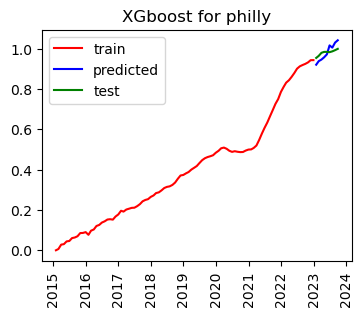

In [122]:
philly.Date = pd.to_datetime(new_york.Date)
train = philly[philly.Date.dt.year < 2023]
test = philly[philly.Date.dt.year >= 2023]
ypred = xgBoost(train,test)

In [123]:
print("the mean squared error is ", mean_squared_error(test.Value, ypred))
print("the r2 score is ", r2_score(test.Value, ypred))

the mean squared error is  0.0009470812985033985
the r2 score is  -4.581944989340827
